# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [79]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [80]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [81]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/sample_data/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [83]:
data.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### **Observations:**
The statistical summary indicates that the average household income is approximately 52,000. However, there’s a considerable range in values, with incomes spanning from below 20,000 to over 100,000, suggesting that customers belong to diverse income brackets.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [84]:
data.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [85]:
data = data.dropna(subset=['Income'])

In [86]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

In [87]:
data['Customer_Tenure_Days'] = (data['Dt_Customer'].max() - data['Dt_Customer']).dt.days
data[['Dt_Customer', 'Customer_Tenure_Days']].head()

,Dt_Customer,Customer_Tenure_Days
0,2012-09-04,663
1,2014-03-08,113
2,2013-08-21,312
3,2014-02-10,139
4,2014-01-19,161


In [88]:
data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


In [89]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Birth            2216 non-null   int64  
 1   Education             2216 non-null   object 
 2   Marital_Status        2216 non-null   object 
 3   Income                2216 non-null   float64
 4   Kidhome               2216 non-null   int64  
 5   Teenhome              2216 non-null   int64  
 6   Recency               2216 non-null   int64  
 7   MntWines              2216 non-null   int64  
 8   MntFruits             2216 non-null   int64  
 9   MntMeatProducts       2216 non-null   int64  
 10  MntFishProducts       2216 non-null   int64  
 11  MntSweetProducts      2216 non-null   int64  
 12  MntGoldProds          2216 non-null   int64  
 13  NumDealsPurchases     2216 non-null   int64  
 14  NumWebPurchases       2216 non-null   int64  
 15  NumCatalogPurchases   2216

In [90]:
print(data['Education'].value_counts())
print(data['Marital_Status'].value_counts())


Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [91]:
# Replace unusual values with 'Other'
data['Marital_Status'] = data['Marital_Status'].replace(
    ['Alone', 'Absurd', 'YOLO'], 'Other'
)


In [92]:
data['Marital_Status'].value_counts()


,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Other,7


In [93]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Teenhome                 2216 non-null   int64  
 4   Recency                  2216 non-null   int64  
 5   MntWines                 2216 non-null   int64  
 6   MntFruits                2216 non-null   int64  
 7   MntMeatProducts          2216 non-null   int64  
 8   MntFishProducts          2216 non-null   int64  
 9   MntSweetProducts         2216 non-null   int64  
 10  MntGoldProds             2216 non-null   int64  
 11  NumDealsPurchases        2216 non-null   int64  
 12  NumWebPurchases          2216 non-null   int64  
 13  NumCatalogPurchases      2216 non-null   int64  
 14  NumStorePurchases        2216

In [95]:
data = data.astype(int)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Year_Birth               2216 non-null   int64
 1   Income                   2216 non-null   int64
 2   Kidhome                  2216 non-null   int64
 3   Teenhome                 2216 non-null   int64
 4   Recency                  2216 non-null   int64
 5   MntWines                 2216 non-null   int64
 6   MntFruits                2216 non-null   int64
 7   MntMeatProducts          2216 non-null   int64
 8   MntFishProducts          2216 non-null   int64
 9   MntSweetProducts         2216 non-null   int64
 10  MntGoldProds             2216 non-null   int64
 11  NumDealsPurchases        2216 non-null   int64
 12  NumWebPurchases          2216 non-null   int64
 13  NumCatalogPurchases      2216 non-null   int64
 14  NumStorePurchases        2216 non-null   int64
 15  NumWebVis

##### **Observations:**
Yes, there were some missing values in the dataset, mainly in the Income column. Since income plays an important role in understanding customer behavior, and because filling in missing values might have led to inaccurate results, hence decided to remove those rows entirely instead of imputing them.

Also, while cleaning the data,a few changes were made to ensure everything made sense:

In the Marital_Status column, there were some unusual or unclear entries like "YOLO" or "Absurd". These were either removed or grouped into broader, meaningful categories such as "Single", "Married", and so on.

The Education column already had values like "Graduation", "PhD", and "Master", which were consistent, so we kept them as they were, treating them as categorical data.



#### **Question 4**: Are there any duplicates in the data?

In [97]:
data.duplicated().sum()

np.int64(182)





##### **Observations:**
Initially, when checking the raw dataset including all columns (like ID), there were no duplicate rows. However, after cleaning the data — such as dropping unnecessary columns and transforming some values — we ran the check again and found 182 duplicate entries.



## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

Year_Birth
Skew : -0.35


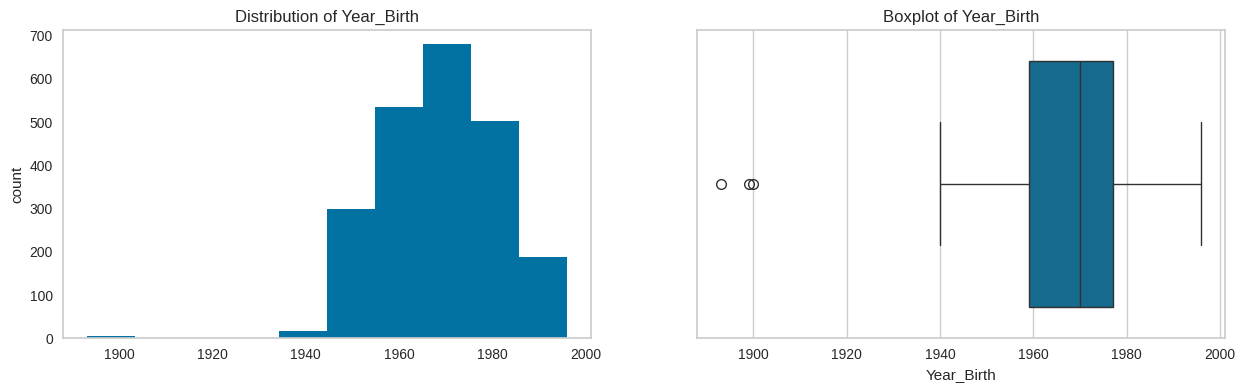

Income
Skew : 6.76


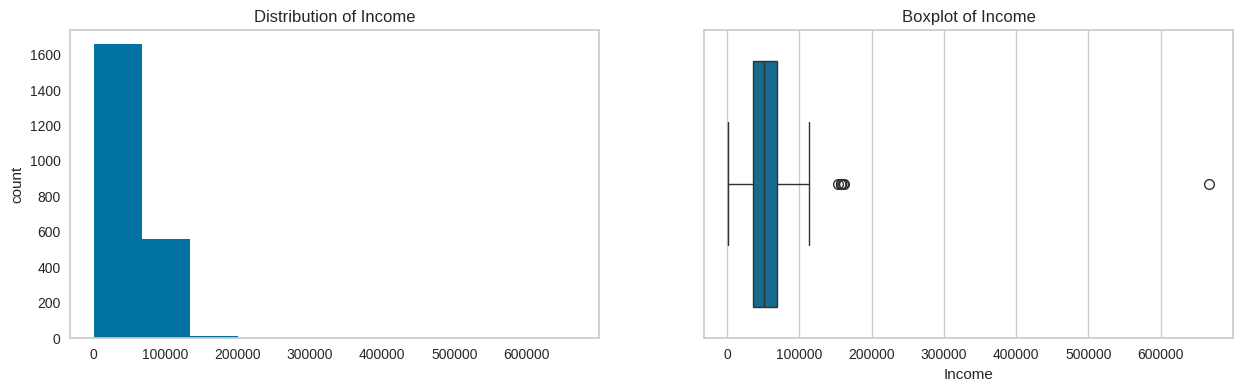

Kidhome
Skew : 0.64


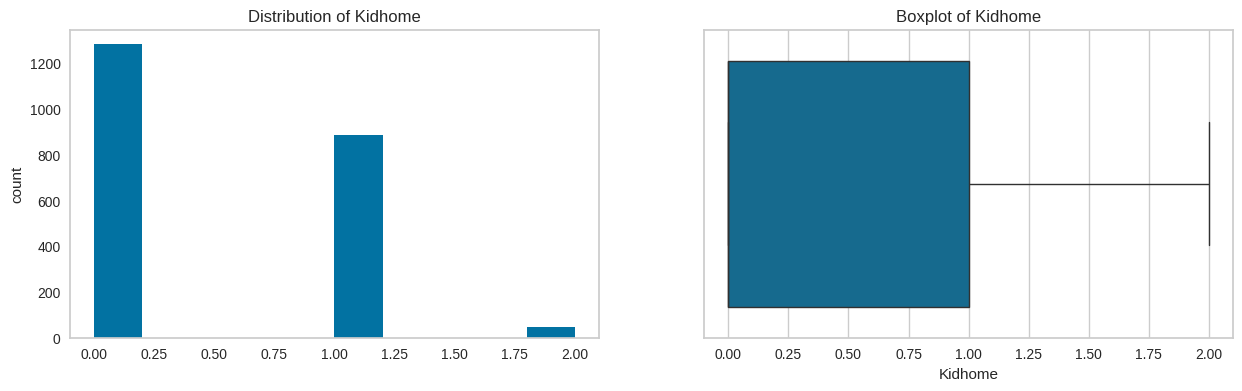

Teenhome
Skew : 0.41


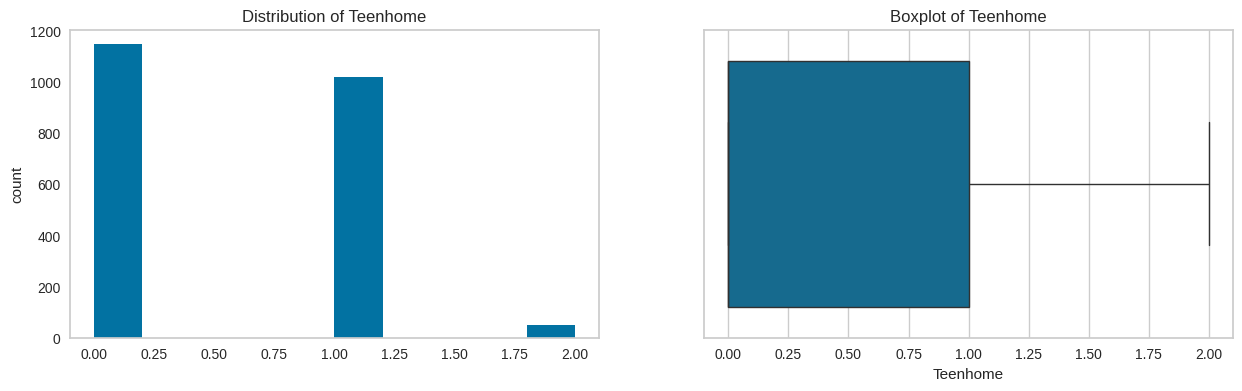

Recency
Skew : 0.0


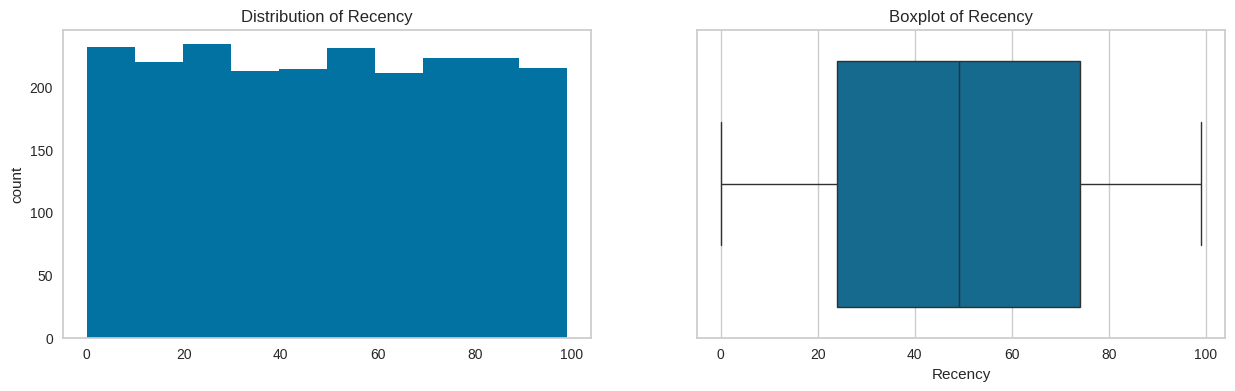

MntWines
Skew : 1.17


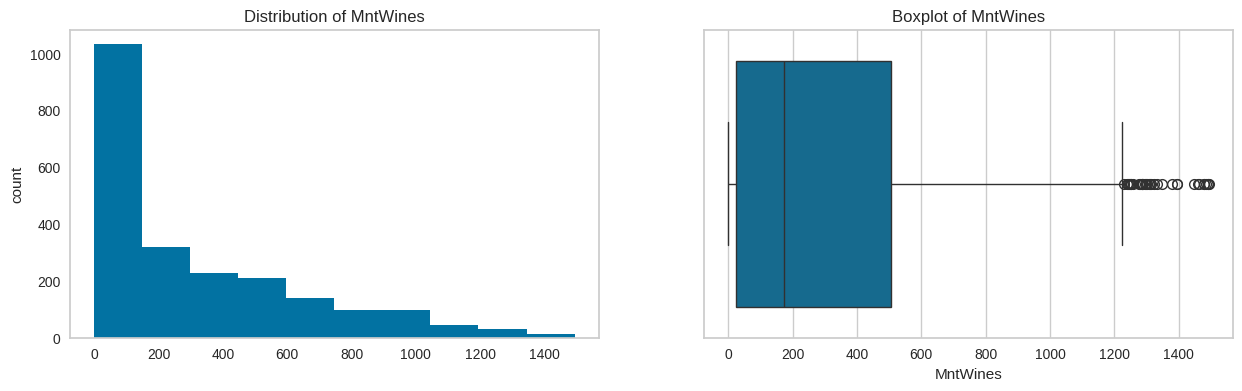

MntFruits
Skew : 2.1


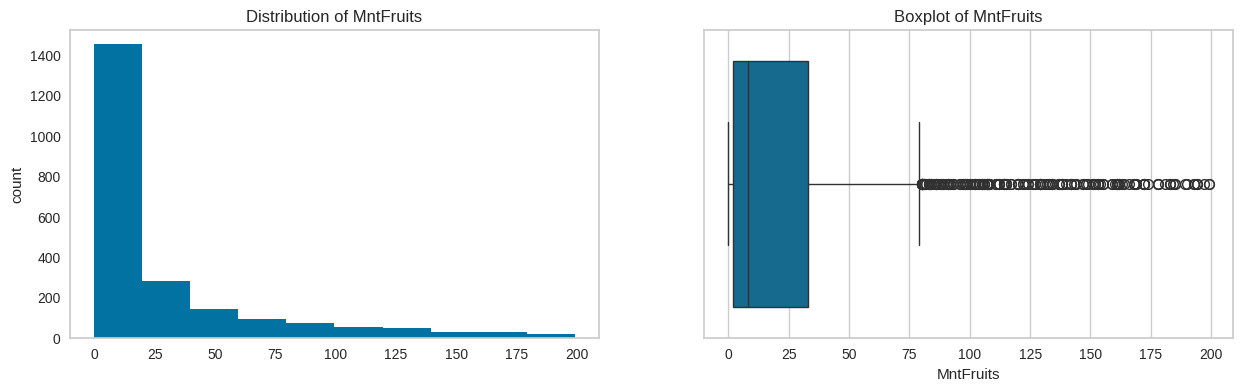

MntMeatProducts
Skew : 2.03


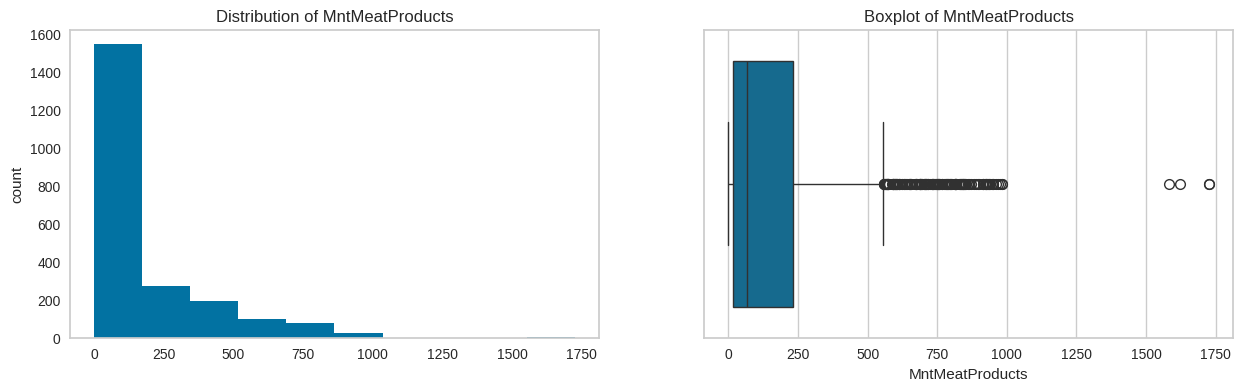

MntFishProducts
Skew : 1.92


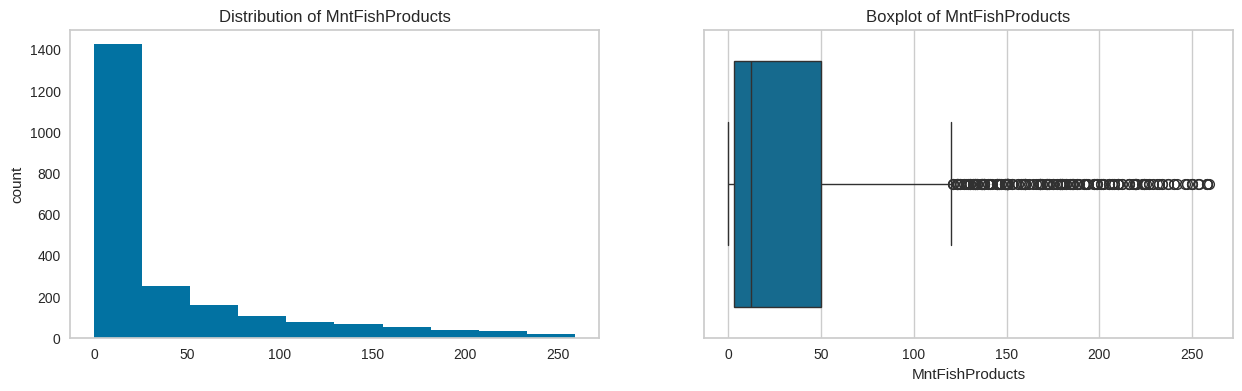

MntSweetProducts
Skew : 2.1


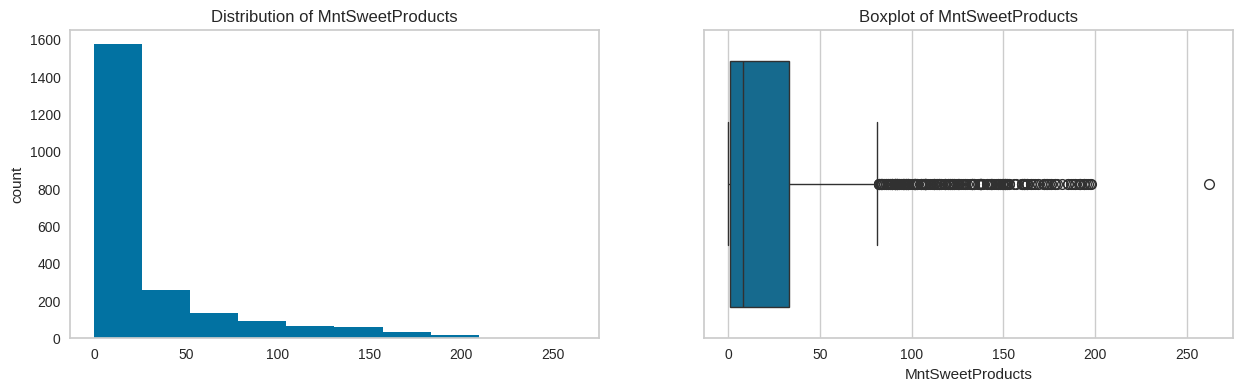

MntGoldProds
Skew : 1.84


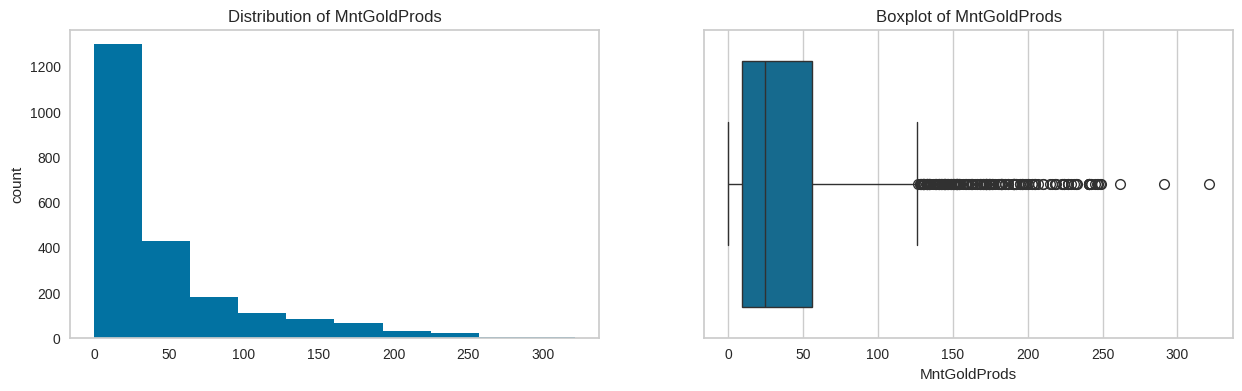

NumDealsPurchases
Skew : 2.42


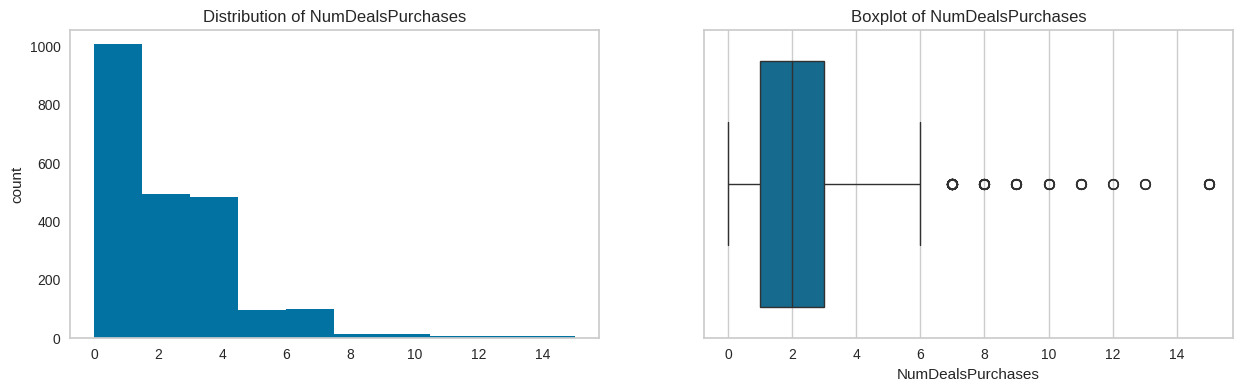

NumWebPurchases
Skew : 1.2


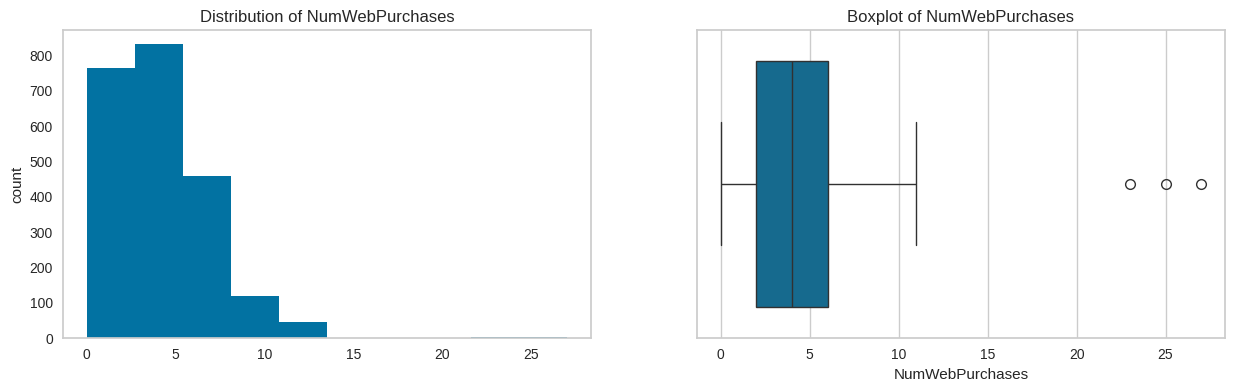

NumCatalogPurchases
Skew : 1.88


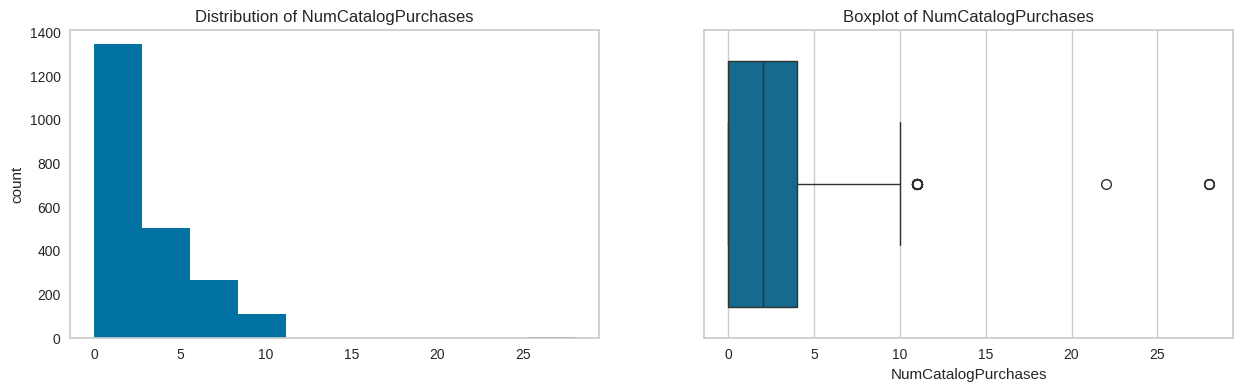

NumStorePurchases
Skew : 0.7


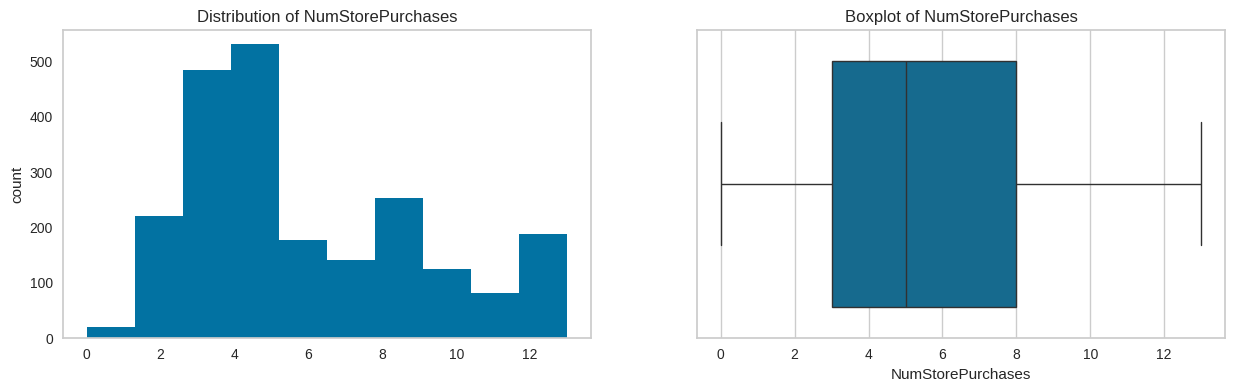

NumWebVisitsMonth
Skew : 0.22


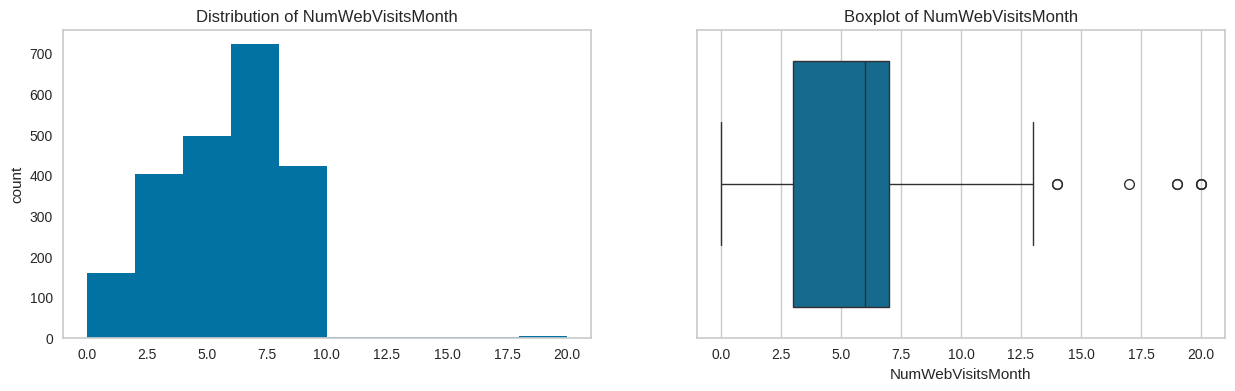

AcceptedCmp3
Skew : 3.27


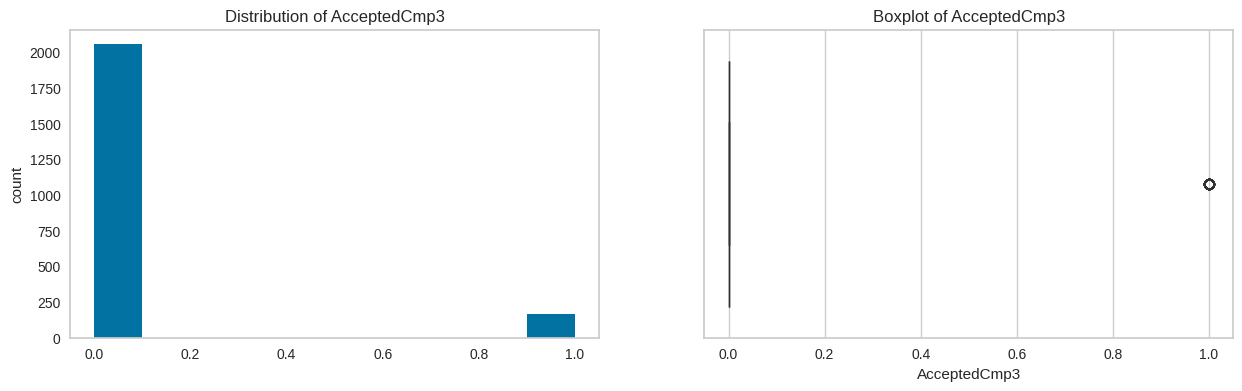

AcceptedCmp4
Skew : 3.26


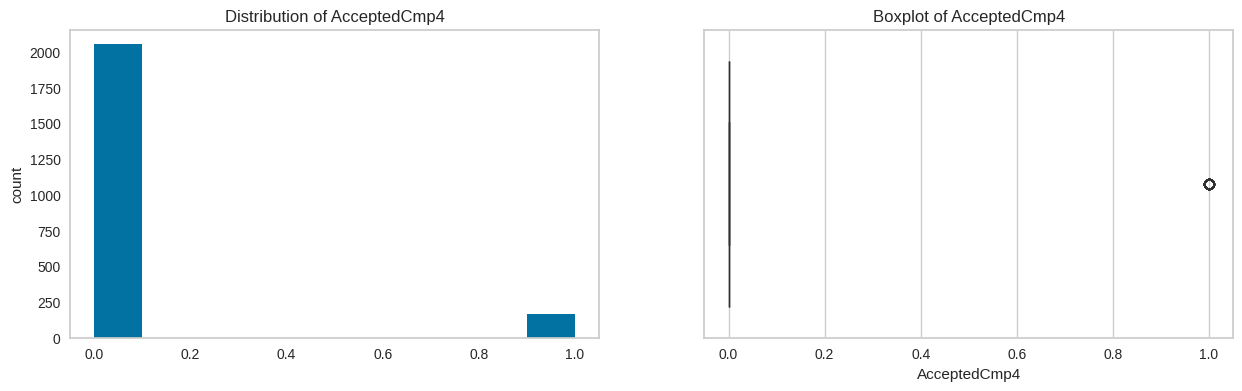

AcceptedCmp5
Skew : 3.28


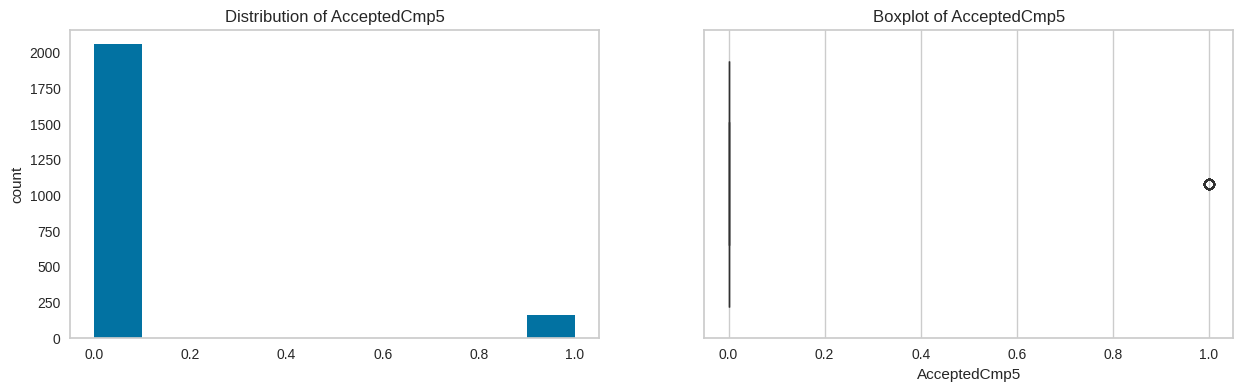

AcceptedCmp1
Skew : 3.56


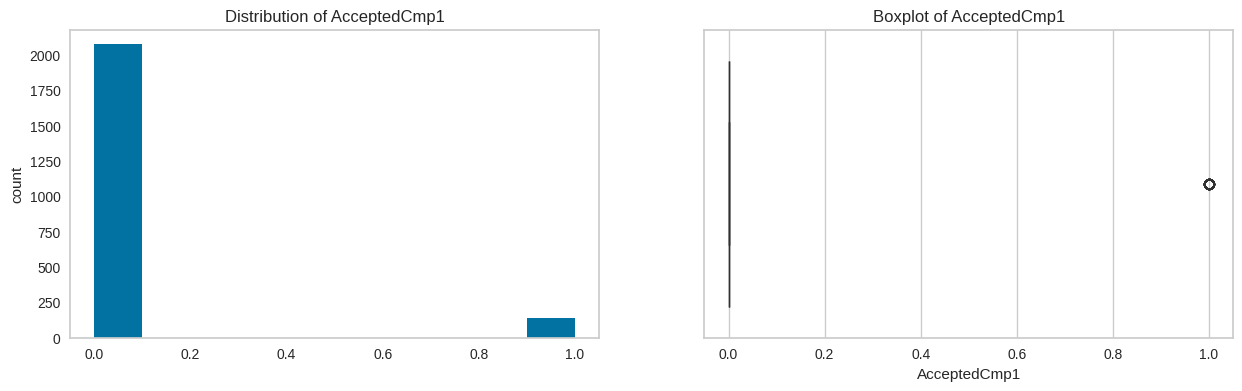

AcceptedCmp2
Skew : 8.42


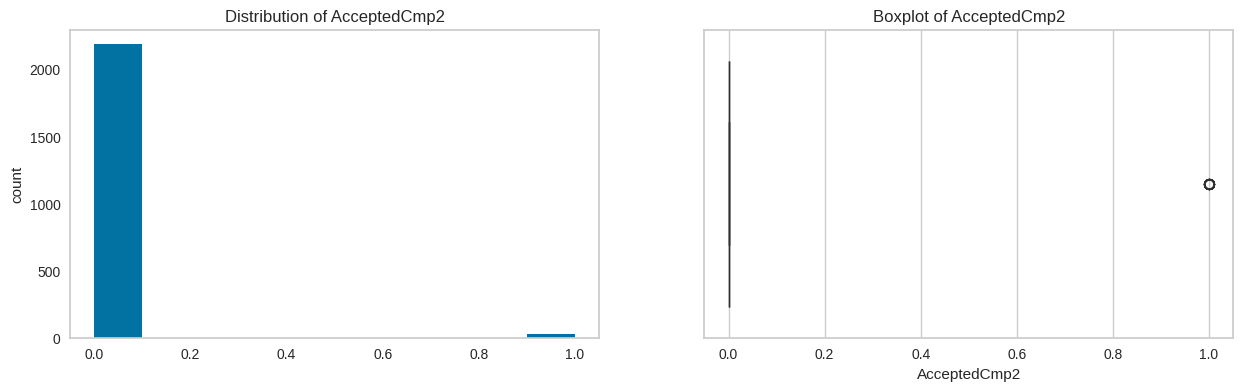

Complain
Skew : 10.13


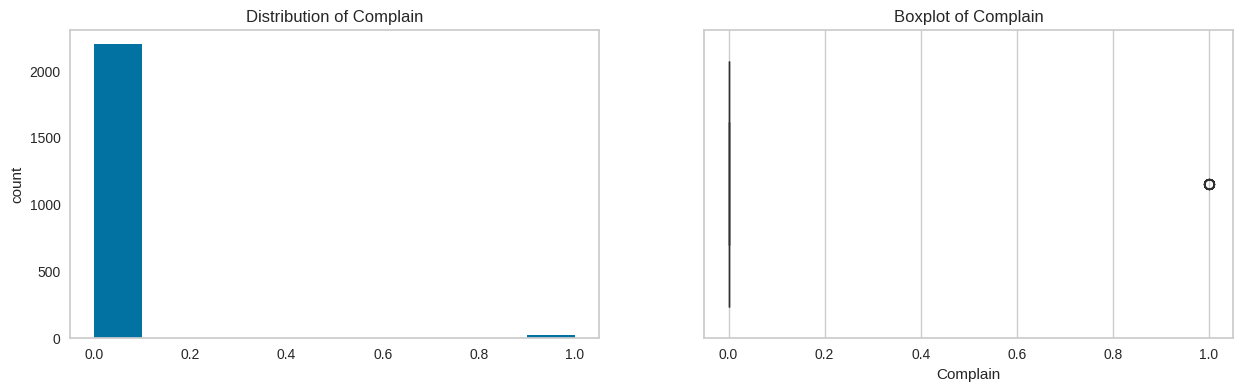

Response
Skew : 1.96


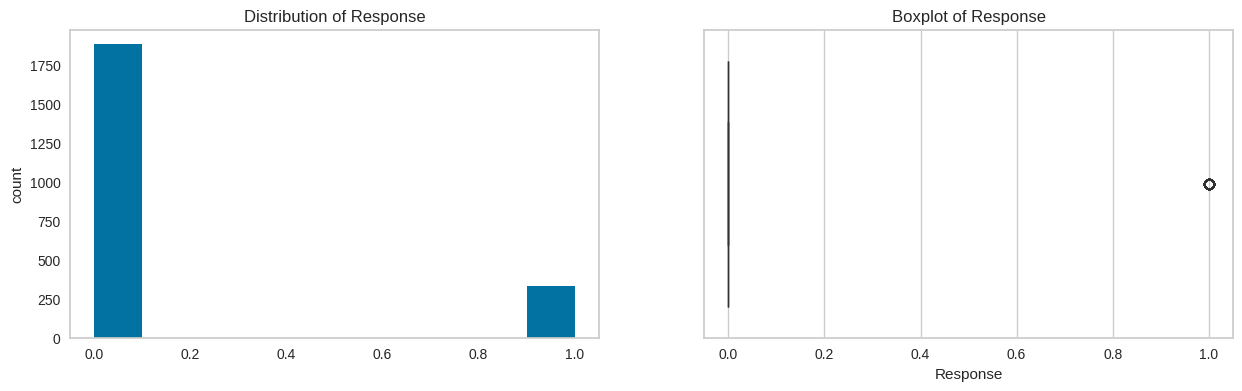

Customer_Tenure_Days
Skew : -0.02


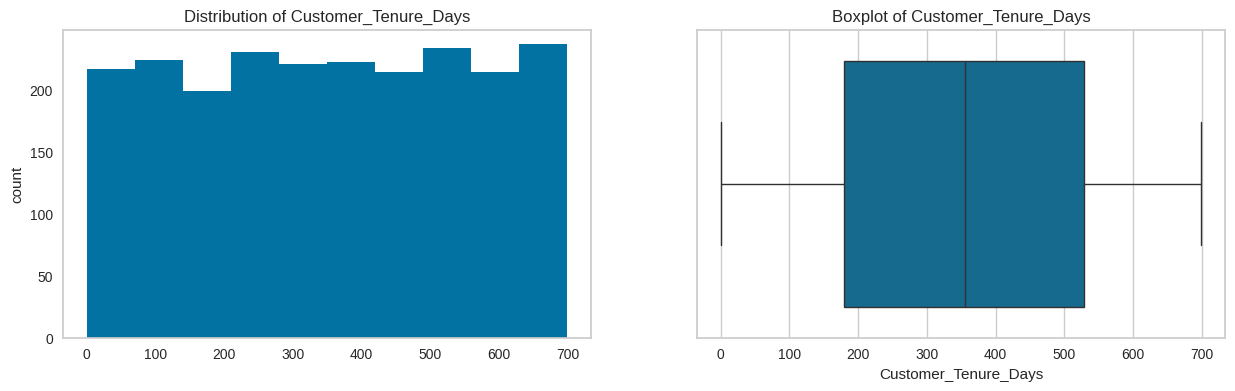

Education_Basic
Skew : 6.17


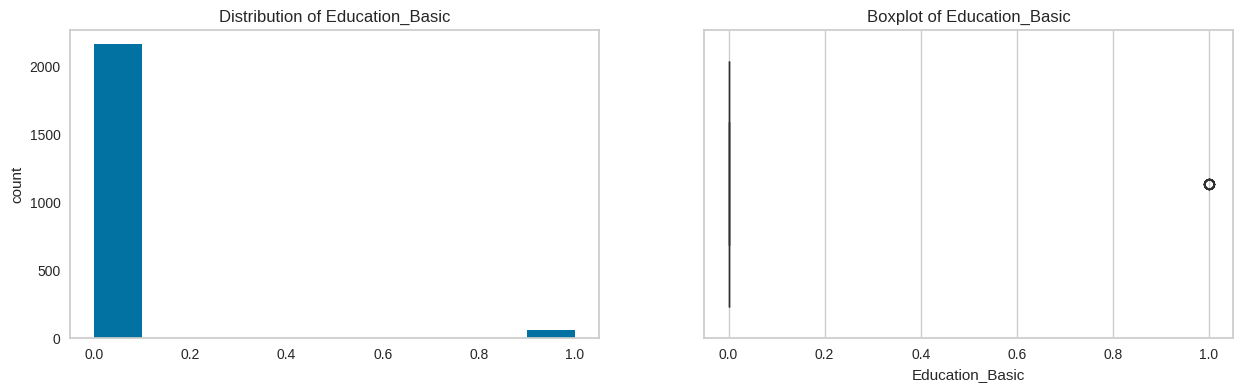

Education_Graduation
Skew : -0.01


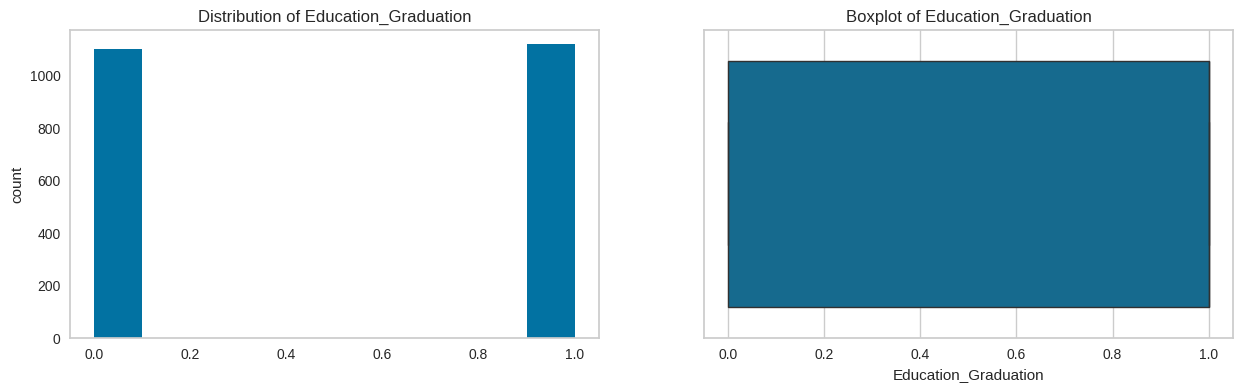

Education_Master
Skew : 1.81


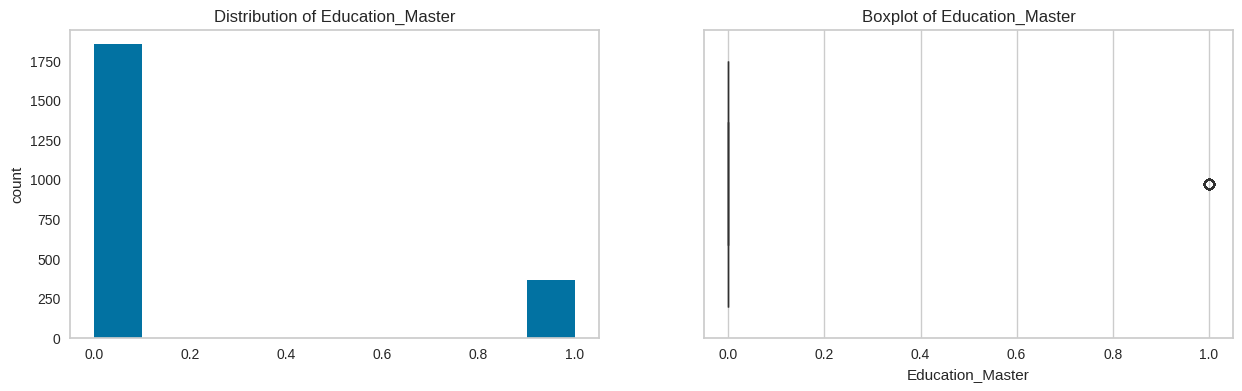

Education_PhD
Skew : 1.37


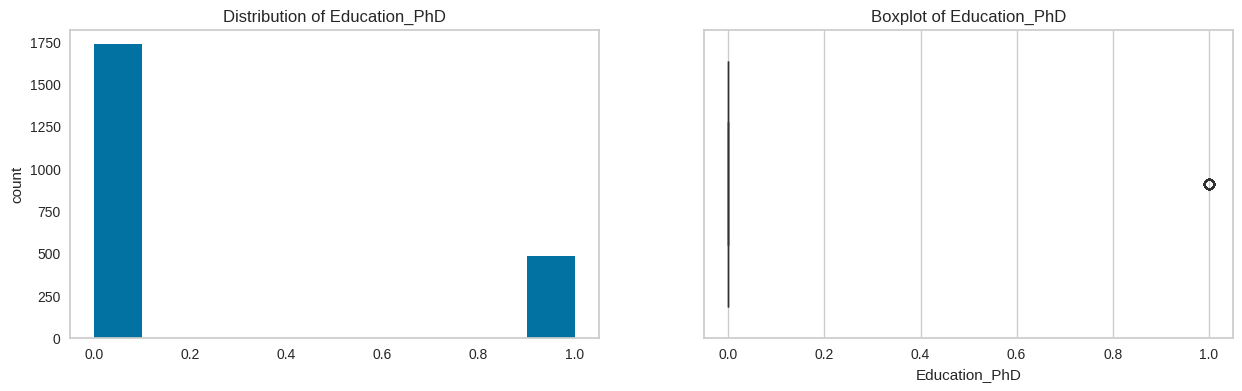

Marital_Status_Married
Skew : 0.47


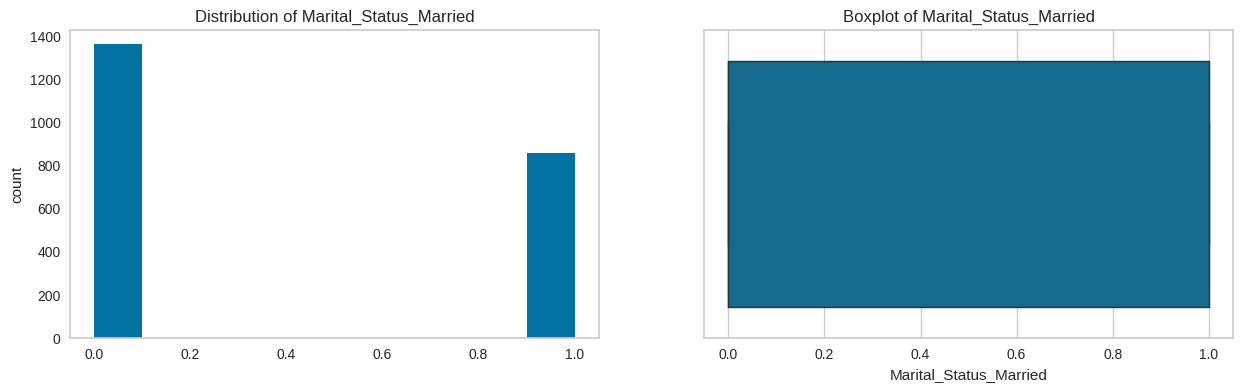

Marital_Status_Other
Skew : 17.72


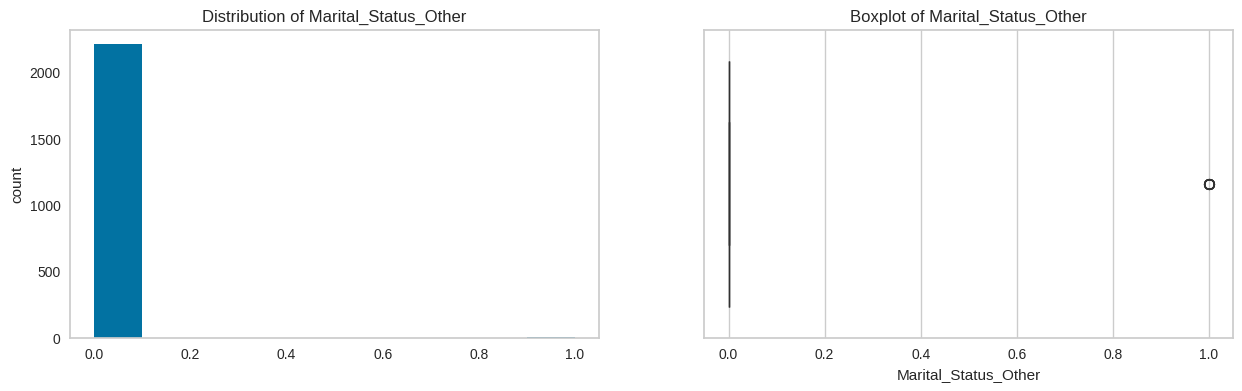

Marital_Status_Single
Skew : 1.41


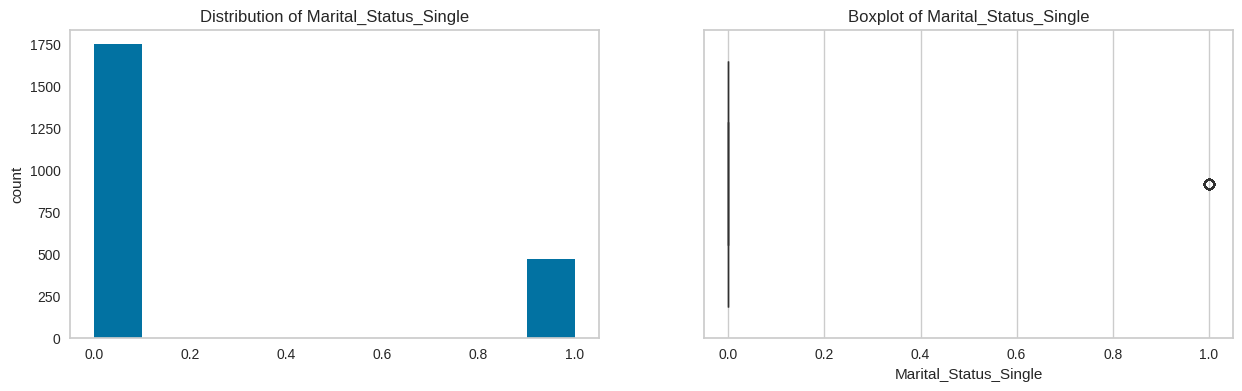

Marital_Status_Together
Skew : 1.1


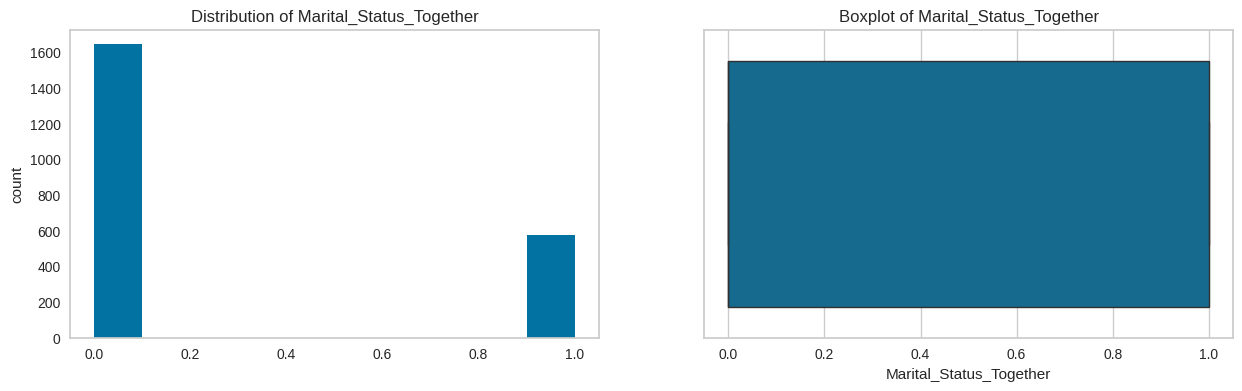

Marital_Status_Widow
Skew : 5.12


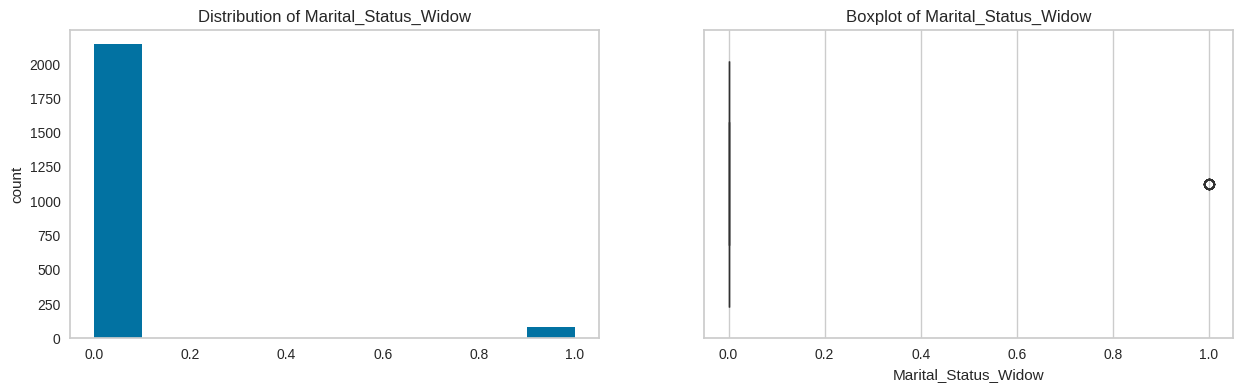

In [98]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


##### **Observations:**
Observation:
From the histograms and boxplots:

Income is right-skewed with a few high-income outliers.

Year_Birth shows a concentration around 1970–1990.

Product-related spendings (e.g., MntWines, MntFruits) have many low values with some higher extremes, indicating a skewed distribution.

Features like NumDealsPurchases and NumStorePurchases are categorical-like with limited unique values, often between 0–5.



### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

<Axes: >

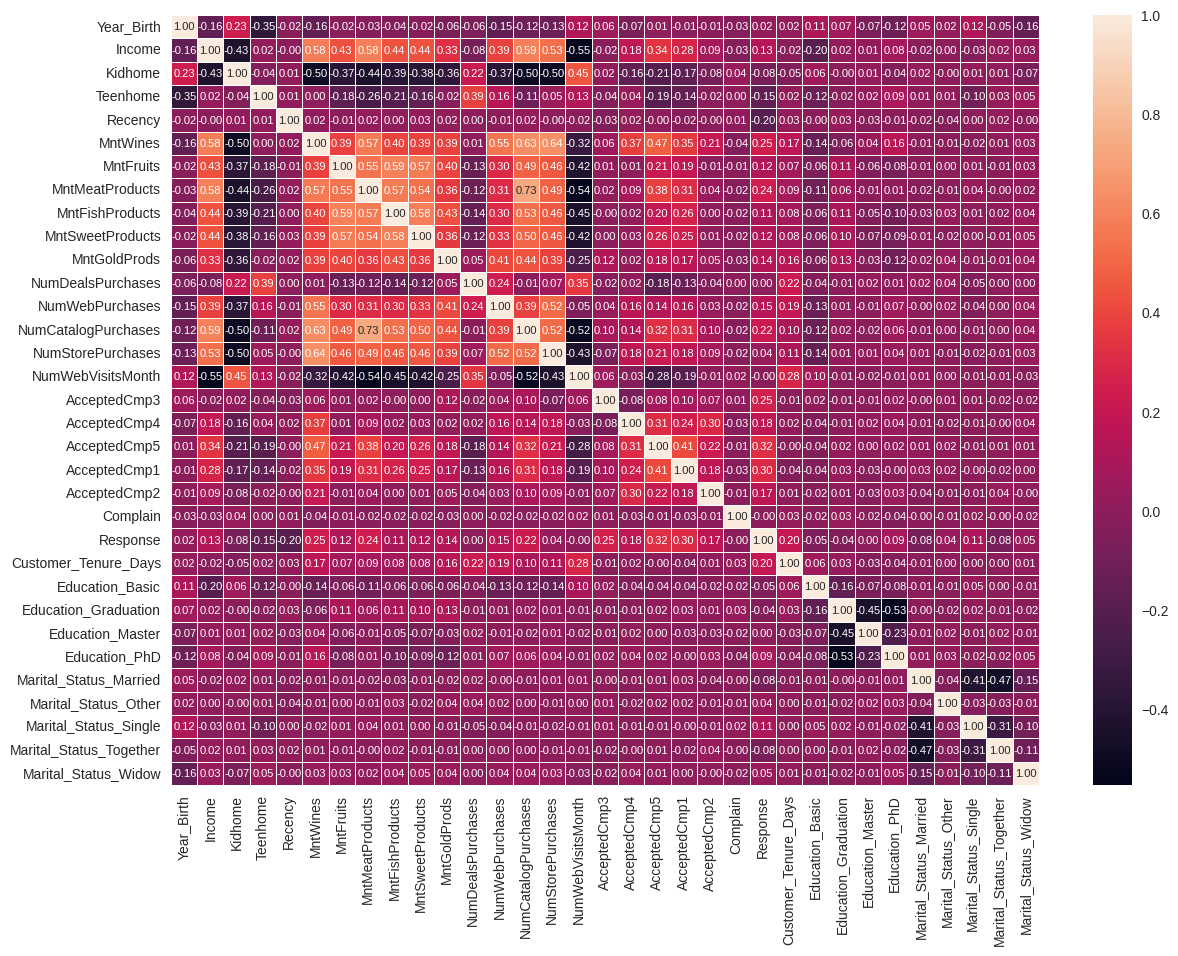

In [99]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    data.corr(),
    annot=True,
    fmt='.2f',linewidths=0.5,annot_kws={"size": 8} )

##### **Observations:**
Positive correlations:

There’s a strong positive correlation between the various product spending features like MntWines, MntFruits, MntMeatProducts, MntFishProducts, and MntSweetProducts. This suggests that customers who spend more in one category tend to spend more in others too — likely indicating a higher overall spending behavior.

NumCatalogPurchases, NumStorePurchases, and NumWebPurchases also show moderate to strong positive correlations, suggesting overlap in purchasing channels.

Income has a moderate positive correlation with product-related variables and some campaign acceptances, suggesting higher-income customers are more responsive and spend more.

Education and marital status dummies show very weak correlations, meaning they do not strongly influence most of the numerical features.



## **K-means Clustering**

In [101]:
#Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# (Optional) Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)


#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

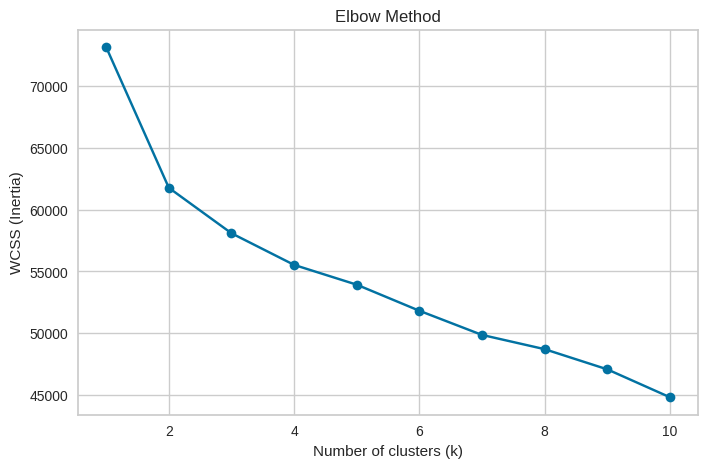

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Try cluster numbers from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()




```
```

##### **Observations:**
The Elbow Plot shows a distinct bend at k = 3, suggesting that 3 clusters may be a good choice as it balances within-cluster compactness with model simplicity.


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [103]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score for k = {k}: {sil_score:.4f}")

Silhouette Score for k = 2: 0.1844
Silhouette Score for k = 3: 0.1184
Silhouette Score for k = 4: 0.1209
Silhouette Score for k = 5: 0.0697
Silhouette Score for k = 6: 0.0662
Silhouette Score for k = 7: 0.1255
Silhouette Score for k = 8: 0.0831
Silhouette Score for k = 9: 0.1142
Silhouette Score for k = 10: 0.0873


##### **Observations:**
Silhouette scores were calculated for k=2 to k=10. The highest silhouette score was observed for k = 2 (0.1844). Although k=3 looked promising in the elbow method, the score indicates that k=2 provides better-defined clusters.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [104]:
from sklearn.cluster import KMeans
import time

# Start timer
start_time = time.time()

# Final KMeans fit
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

# End timer
end_time = time.time()
fit_time = end_time - start_time

print(f"⏱️ Model fit time: {fit_time:.2f} seconds")


⏱️ Model fit time: 0.01 seconds


##### **Observations:**
The final model was fitted using k = 2, which took only 0.01 seconds, demonstrating that the K-Means algorithm is computationally efficient on this dataset.



## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [105]:
data['Cluster'] = kmeans.labels_


In [106]:
# Group by cluster and calculate mean & median
mean = data.groupby('Cluster').mean(numeric_only=True)
median = data.groupby('Cluster').median(numeric_only=True)

# Combine
df_kmeans = pd.concat([mean, median], axis=0)

# Dynamically rename rows based on number of clusters
num_clusters = data['Cluster'].nunique()
df_kmeans.index = (
    [f'Cluster_{i} Mean' for i in range(num_clusters)] +
    [f'Cluster_{i} Median' for i in range(num_clusters)]
)

# Transpose for better display
df_kmeans.T.head(10)



,Cluster_0 Mean,Cluster_1 Mean,Cluster_0 Median,Cluster_1 Median
Year_Birth,1969.987294,1967.042141,1971.0,1967.0
Income,39080.150224,72312.833713,38480.0,71648.0
Kidhome,0.690583,0.062642,1.0,0.0
Teenhome,0.558296,0.424829,1.0,0.0
Recency,48.743647,49.422551,49.0,51.0
MntWines,106.023169,608.455581,35.0,562.0
MntFruits,6.665919,56.362187,3.0,42.0
MntMeatProducts,37.916293,363.702733,20.0,303.0
MntFishProducts,9.840807,79.997722,4.0,63.0
MntSweetProducts,6.855007,57.772210,3.0,43.0


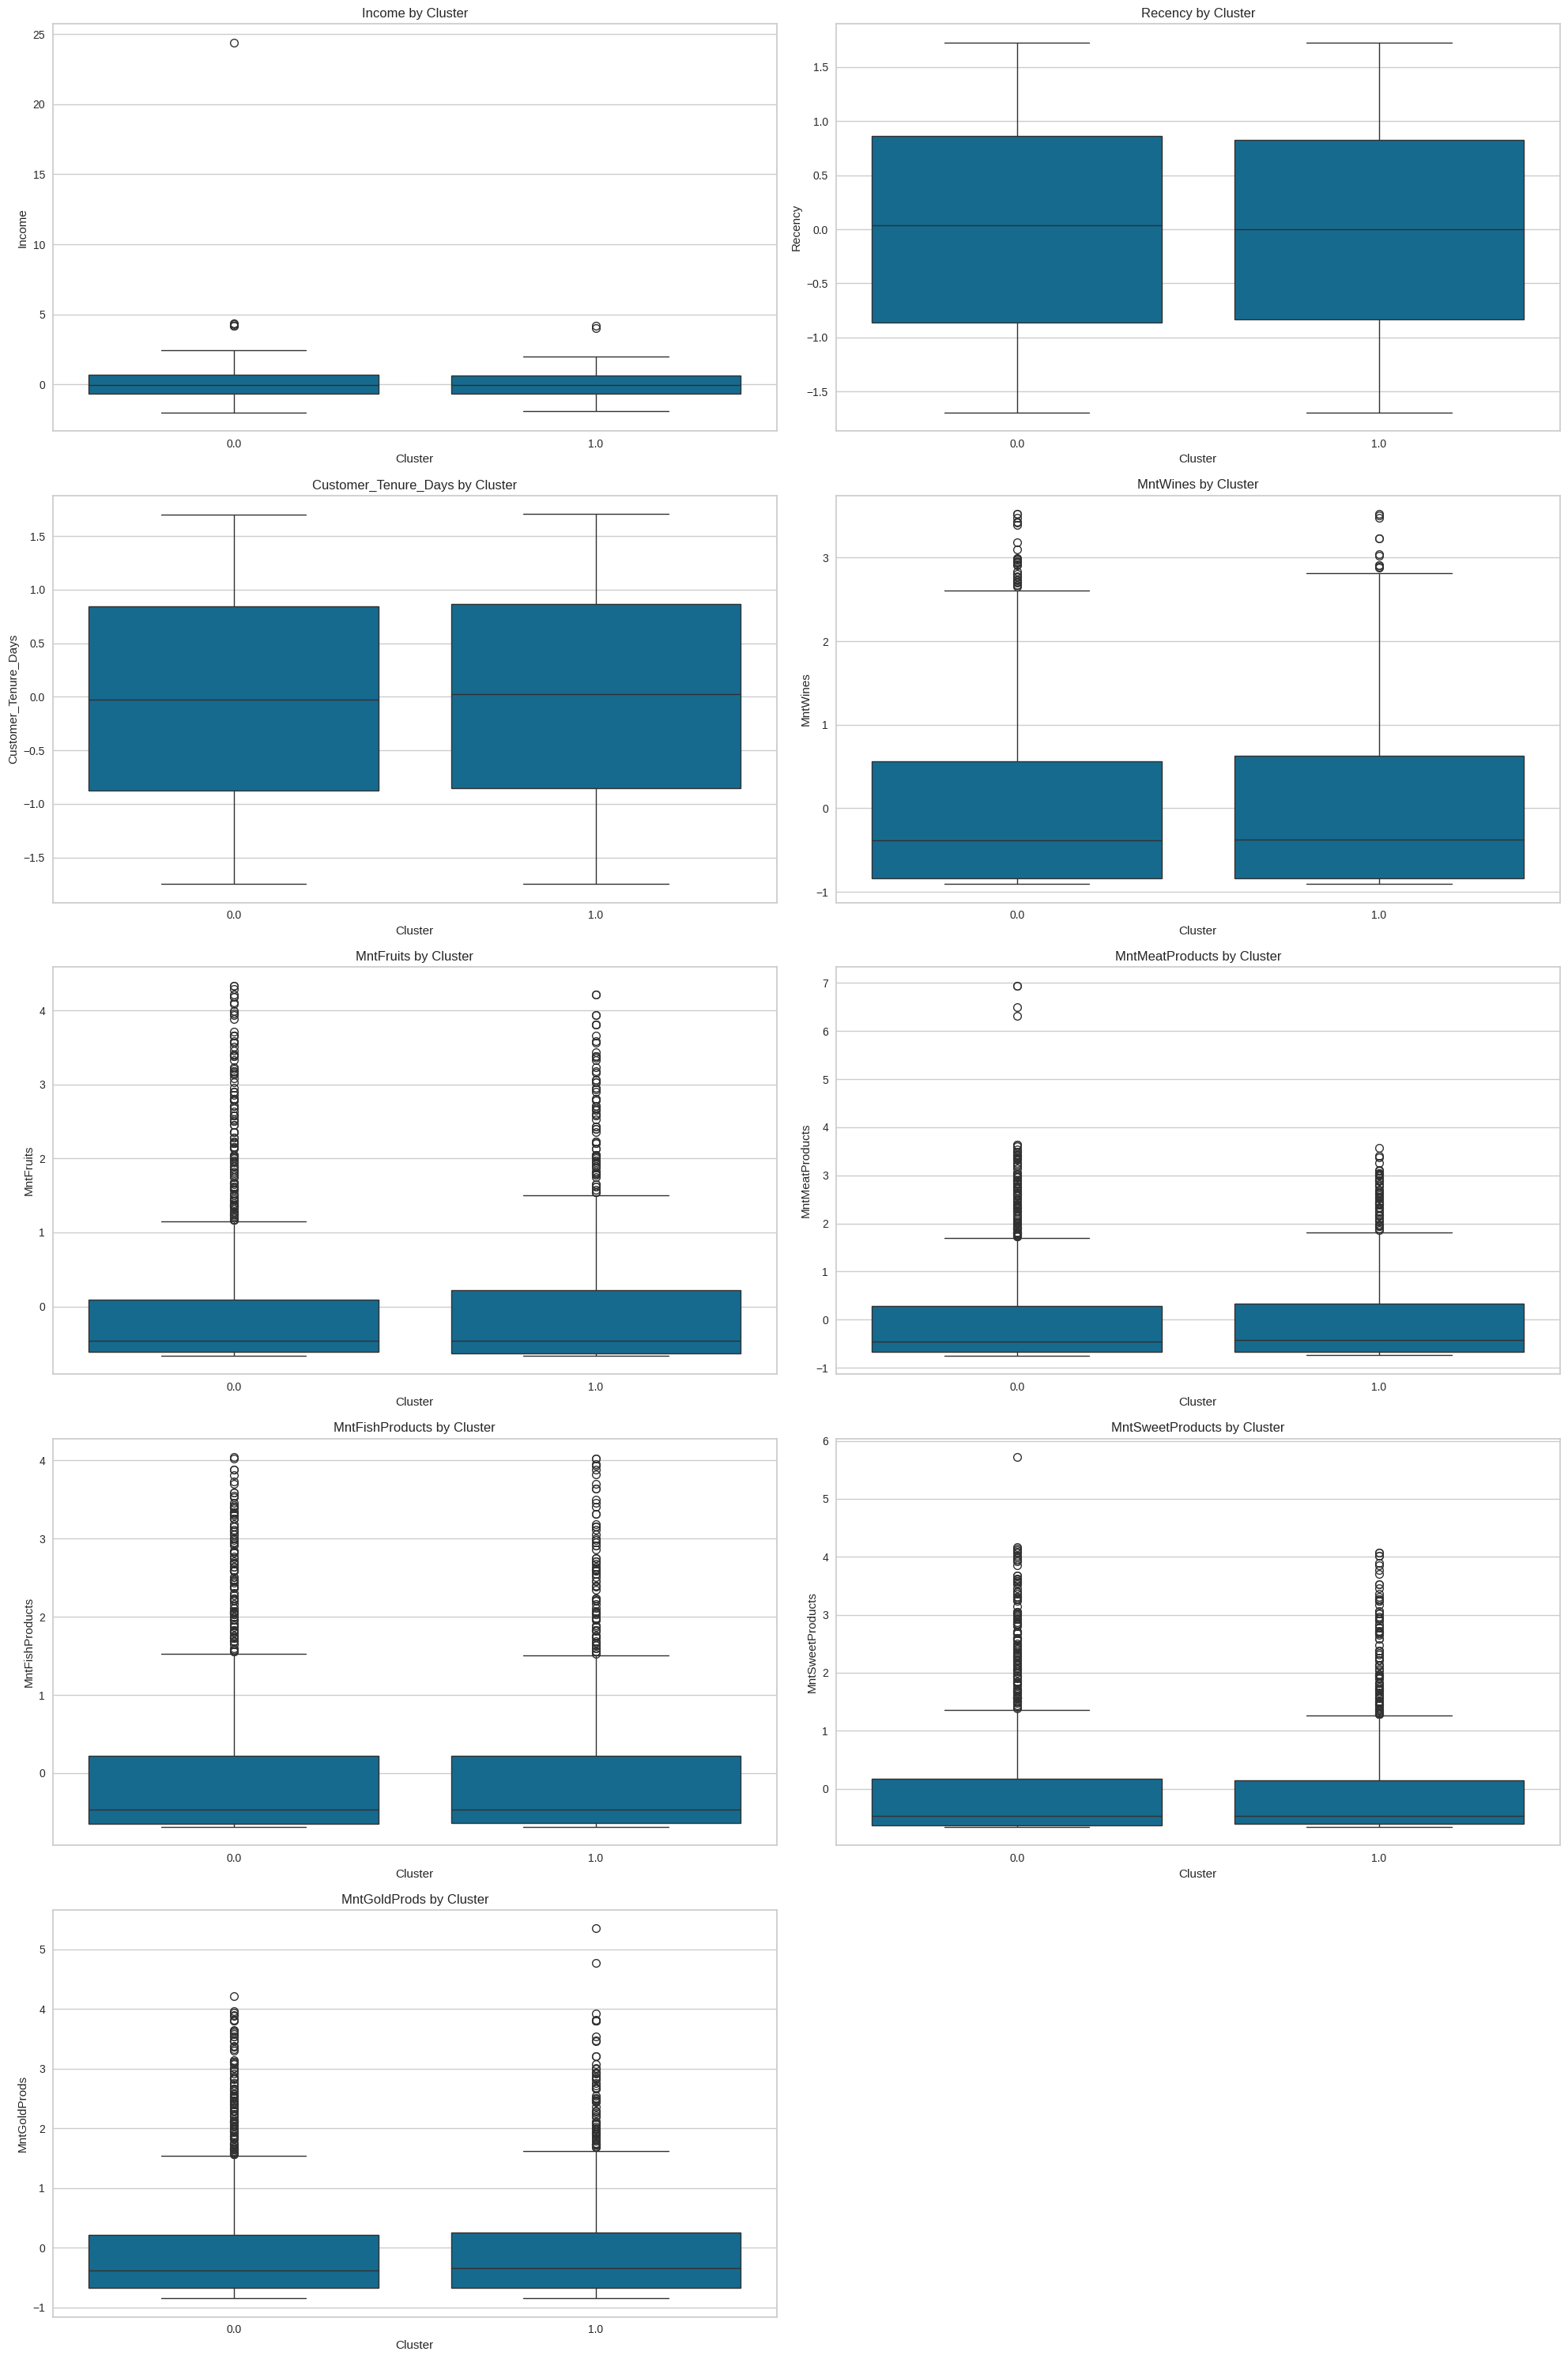

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add Cluster column to the scaled DataFrame as well
scaled_df['Cluster'] = data['Cluster']

# Select important features for profiling
selected_features = [
    'Income', 'Recency', 'Customer_Tenure_Days',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Plot boxplots
plt.figure(figsize=(20, 30))
for i, col in enumerate(selected_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=scaled_df, x='Cluster', y=col)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()


##### **Observations:**

Boxplots show:

Cluster 0: Lower income, fewer online visits, and less spending on premium products.

Cluster 1: Higher income, greater spending on all product categories, and more online interactions.
This suggests that Cluster 1 contains high-value customers, while Cluster 0 represents more modest spenders.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

In [37]:
# Select features to visualize cluster differences
features_to_plot = [
    'Income', 'Recency', 'Customer_Tenure_Days',
    'MntWines', 'MntMeatProducts', 'MntFruits',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]


In [38]:
# Get mean values per cluster
cluster_means = data.groupby('Cluster')[features_to_plot].mean()


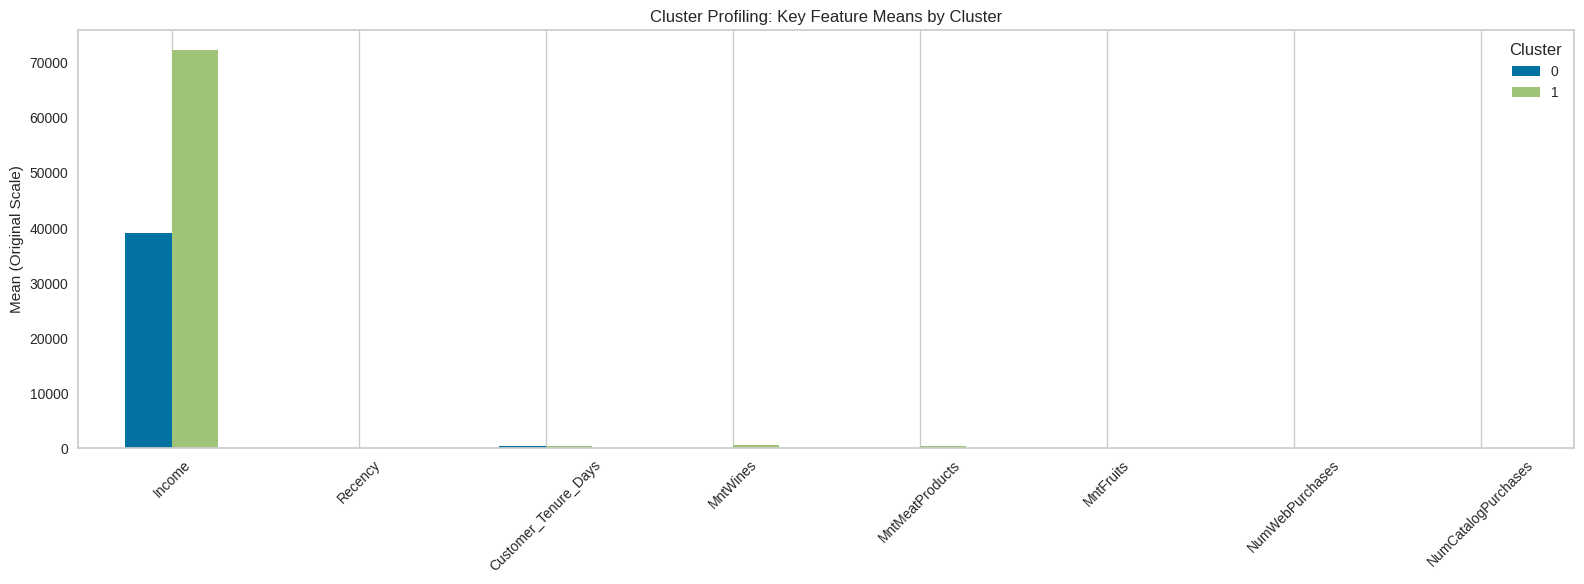

In [45]:
important_features = [
    'Income', 'Recency', 'Customer_Tenure_Days',
    'MntWines', 'MntMeatProducts', 'MntFruits',
    'NumWebPurchases', 'NumCatalogPurchases'
]

data[important_features + ['Cluster']].groupby('Cluster').mean().T.plot(
    kind='bar', figsize=(16, 6)
)
plt.title('Cluster Profiling: Key Feature Means by Cluster')
plt.ylabel('Mean (Original Scale)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()





##### **Observations:**
Barplots (based on standardized features) reveal:

Cluster 1 exhibits higher-than-average z-scores across almost all variables (e.g., Income, MntWines, WebPurchases), suggesting affluent, engaged customers.

Cluster 0 tends to have negative z-scores, indicating lower values across most features, including income, response rates, and product purchases.



## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

##### **SOLUTION**

Based on our K-Means clustering with k=2,identified two distinct customer segments, each showing unique behaviors and preferences. Understanding these differences allows us to design more effective and personalized strategies.

-> Cluster 0 appears to represent a more price-conscious segment. These customers typically have lower incomes, make fewer purchases, and haven’t engaged with the store in a while — as indicated by their higher recency values. They also tend to live in larger households with more kids at home. Their responses to past marketing campaigns have been quite low, and they’re less active on online platforms, suggesting a preference for offline engagement. Additionally, they seem newer to the brand, with shorter customer tenure.

-> Cluster 1, on the other hand, includes the brand’s most valuable customers. They have higher incomes, shop frequently — especially for premium items like wines, meats, and even gold products — and they engage more recently and more often. These customers show strong loyalty, indicated by longer tenure and high response rates to marketing campaigns. They are also digitally inclined, making more online and catalog purchases, which signals comfort with tech and convenience-driven shopping.


strategies to be implemented:

->Personalized Marketing: For Cluster 1, we should continue with premium product promotions and loyalty rewards. Exclusive deals and early access to new collections would keep them engaged. In contrast, Cluster 0 would respond better to budget-friendly bundles and first-time discount offers.

->Retention Efforts: For high-value Cluster 1 customers, introducing tiered loyalty programs or subscriptions could deepen their relationship with the brand. Cluster 0 may benefit from reactivation campaigns, such as “Welcome back” discounts to encourage return visits.

->Inventory & Layout Optimization: In locations dominated by Cluster 1, stores should focus on stocking high-end goods and making the in-store experience quick and premium. Meanwhile, stores with more Cluster 0 customers should highlight value-driven products, family-oriented promotions, and clearly labeled deals.

->Customer Value Maximization: Cluster 1 customers are clearly high in lifetime value. Proactively monitoring their behavior can help us predict and prevent churn. Although Cluster 0 shows lower current value, they hold potential. With the right incentives and tailored campaigns, they can be nurtured into more engaged, valuable customers.





